In [55]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape
from keras.models import Model
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [15]:
(X_train, _), (X_test, _) = mnist.load_data()

In [16]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [44]:
input_img = Input(shape=(28, 28, 1))
encoded = Dense(32, activation='relu')(input_img)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation='relu')(decoded)
# decoded = Dense(784, activation='sigmoid')(decoded)
# decoded = Reshape((28, 28, 1,))(decoded)

In [45]:
autoencoder = Model(input_img, decoded)

In [46]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/10
469/469 [==============================] - 88s 183ms/step - loss: 0.6471 - val_loss: 0.4352
Epoch 2/10
469/469 [==============================] - 84s 178ms/step - loss: 0.4261 - val_loss: 0.4305
Epoch 3/10
469/469 [==============================] - 83s 177ms/step - loss: 0.4255 - val_loss: 0.4305
Epoch 4/10
469/469 [==============================] - 83s 176ms/step - loss: 0.4259 - val_loss: 0.4395
Epoch 5/10
469/469 [==============================] - 82s 175ms/step - loss: 0.4265 - val_loss: 0.4305
Epoch 6/10
469/469 [==============================] - 83s 176ms/step - loss: 0.4257 - val_loss: 0.4392
Epoch 7/10
469/469 [==============================] - 83s 177ms/step - loss: 0.4266 - val_loss: 0.4305
Epoch 8/10
469/469 [==============================] - 83s 176ms/step - loss: 0.4253 - val_loss: 0.4305
Epoch 9/10
469/469 [==============================] - 85s 182ms/step - loss: 0.4258 - val_loss: 0.4305
Epoch 10/10
469/469 [==============================] - 84s 180ms/step - l

In [51]:
encoder = Model(input_img, encoded)
encoded_img = encoder.predict(X_test)
decoded_img = autoencoder.predict(X_test)

313/313 [==============================] - 7s 16ms/step


In [52]:
score = autoencoder.evaluate(X_test, verbose=0)
print('Test loss: ', score)


Test loss:  0.0


ValueError: Exception encountered when calling layer "tf.reshape_7" (type TFOpLambda).

Cannot reshape a tensor with 25088 elements to shape [28,28] (784 elements) for '{{node tf.reshape_7/Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](Placeholder, tf.reshape_7/Reshape/shape)' with input shapes: [28,28,32], [2] and with input tensors computed as partial shapes: input[1] = [28,28].

Call arguments received by layer "tf.reshape_7" (type TFOpLambda):
  • tensor=tf.Tensor(shape=(28, 28, 32), dtype=float32)
  • shape=('28', '28')
  • name=None

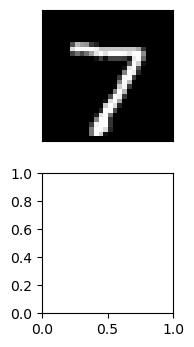

In [76]:
#Show a sample of original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    #original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #reconstructed image
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(tf.reshape(decoded[i], (28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
